In [ ]:
! pip install -r requirements.txt

# Get data and transform it from txt to csv

In [1]:
# import csv

# def txt_to_csv(input_file, output_file):
#     with open(input_file, 'r') as txtfile, open(output_file, 'w', newline='') as csvfile:
#         csv_writer = csv.writer(csvfile)
#         for line in txtfile:
#             # Dividir la línea utilizando ":::" como separador
#             parts = line.strip().split(":::")
#             # Escribir las partes en el archivo CSV
#             csv_writer.writerow(parts)
   

# txt_to_csv('../data/Movies/train_data.txt', '../data/Movies/train_data.csv')
# txt_to_csv('../data/Movies/test_data.txt', '../data/Movies/test_data.csv')
# txt_to_csv('../data/Movies/test_data_solution.txt', '../data/Movies/test_data_solution.csv')


# Dataframe with Document names, lables and text

In [2]:
import pandas as pd
train_df = pd.read_csv('../data/Movies/train_data.csv', header=None, usecols=[1,2,3], names=['title', 'genre', 'plot'])
test_df = pd.read_csv('../data/Movies/test_data_solution.csv', header=None, usecols=[1,2,3], names=['title', 'genre', 'plot'])
# Remove blank spaces in genre
train_df['genre'] = train_df['genre'].str.strip()
test_df['genre'] = test_df['genre'].str.strip()
test_df.head()

,title,genre,plot
0,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [3]:
# Genres:
train_df['genre'].unique()

array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'], dtype=object)

# Text cleaning and processing steps
1. Remove punctuations
2. Convert text to tokens
3. Remove tokens of length less than or equal to 3
4. Remove stopwords using NLTK corpus stopwords list to match
5. Apply stemming
6. Apply lemmatization
7. Add tags
8. Create sentences

In [4]:
from preprocess import *

clean_train_df = process_text(train_df)
clean_train_df.head(2)

c:\Users\laura\OneDrive - Universidad Politécnica de Madrid\ABC_upm\VSC\HMDA_Information_retrieval\Assignment1\preprocess.py:27: SyntaxWarning: invalid escape sequence '\s'
  return text.apply(lambda x: re.split("\s+", x))


,title,genre,plot,no_punct,tokenized,no_small_words,no_stopwords,lemmatized,pos_tagged,processed_text
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening in to a conversation between his doc...,"[listening, in, to, a, conversation, between, ...","[listening, conversation, between, doctor, par...","[listening, conversation, doctor, parents, 10-...","[listening, conversation, doctor, parent, 10-y...","[(listening, VBG), (conversation, NN), (doctor...",listening conversation doctor parent 10-year-o...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,a brother and sister with a past incestuous re...,"[a, brother, and, sister, with, a, past, inces...","[brother, sister, with, past, incestuous, rela...","[brother, sister, past, incestuous, relationsh...","[brother, sister, past, incestuous, relationsh...","[(brother, NN), (sister, NN), (past, IN), (inc...",brother sister past incestuous relationship cu...


In [5]:
# save the processed data
clean_train_df.to_csv('../data/Movies/clean_train_data.csv', index=False)
# # read processed data
# clean_train_df = pd.read_csv('../data/Movies/clean_train_data.csv')
# clean_train_df[['title', 'genre', 'plot','processed_text']].head()

In [6]:
clean_test_df = process_text(test_df)
# save the processed data
clean_test_df.to_csv('../data/Movies/clean_test_data.csv', index=False)
# # read processed data test
# clean_test_df = pd.read_csv('../data/Movies/clean_test_data.csv')
clean_test_df.head(2)

,title,genre,plot,no_punct,tokenized,no_small_words,no_stopwords,lemmatized,pos_tagged,processed_text
0,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...","l.r. brane loves his life - his car, his apart...","[l.r, ., brane, loves, his, life, -, his, car,...","[brane, loves, life, apartment, especially, gi...","[brane, loves, life, apartment, especially, gi...","[brane, love, life, apartment, especially, gir...","[(brane, NN), (loves, VBZ), (life, NN), (apart...",brane love life apartment especially girlfrien...
1,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...","spain, march 1964: quico is a very naughty chi...","[spain, ,, march, 1964, :, quico, is, a, very,...","[spain, march, 1964, quico, very, naughty, chi...","[spain, march, 1964, quico, naughty, child, th...","[spain, march, 1964, quico, naughty, child, th...","[(spain, NN), (march, NN), (1964, CD), (quico,...",spain march 1964 quico naughty child three bel...


In [7]:
# Calculate the most common words in each genre in train
from collections import Counter

genre_words = {}
for genre in clean_train_df['genre'].unique():
    genre_words[genre] = Counter(" ".join(clean_train_df[clean_train_df['genre']==genre]['processed_text']).split()).most_common(10)

# De genre words quedarnos solo con  thriller, horror, drama, comedy, romance, action, sci-fi, adventure
genre_words = {genre: words for genre, words in genre_words.items() if genre in ['thriller', 'horror', 'drama', 'comedy', 'romance', 'action', 'sci-fi', 'adventure']}

In [8]:
genre_words

{'drama': [('life', 8930),
  ('love', 4474),
  ('family', 4293),
  ('young', 4177),
  ('find', 3810),
  ('story', 3696),
  ('father', 3485),
  ('year', 3252),
  ('woman', 3234),
  ('friend', 3112)],
 'thriller': [('life', 681),
  ('find', 558),
  ('young', 327),
  ('murder', 311),
  ('friend', 305),
  ('take', 294),
  ('woman', 291),
  ('year', 274),
  ('wife', 271),
  ('family', 265)],
 'comedy': [('life', 2728),
  ('friend', 1943),
  ('find', 1820),
  ('love', 1715),
  ('make', 1351),
  ('take', 1278),
  ('comedy', 1278),
  ('time', 1250),
  ('show', 1238),
  ('family', 1236)],
 'horror': [('find', 734),
  ('friend', 669),
  ('life', 647),
  ('house', 624),
  ('young', 537),
  ('night', 518),
  ('year', 500),
  ('family', 494),
  ('woman', 476),
  ('horror', 430)],
 'action': [('life', 447),
  ('find', 406),
  ('take', 275),
  ('world', 271),
  ('police', 270),
  ('fight', 239),
  ('friend', 221),
  ('year', 219),
  ('must', 204),
  ('time', 202)],
 'sci-fi': [('earth', 255),
  ('wor

In [9]:
# Recorrer genre_words y contar para cada palabra en cuántos géneros aparece

#dictionary to register in how many genres a word appear
word_dic={}

for genre, words in genre_words.items():
    for word, _ in words:
        count = 0
        for genre2, words2 in genre_words.items():
            for word2, _ in words2:
                if word == word2:
                    count += 1
        # si word no está en word_dic, añadir junto con el número de generos en el que aparece
        if word not in word_dic:
            word_dic[word] = count

# lista con las palabras comunes a 4 o más generos
common_words = [word for word, count in word_dic.items() if count >= 4]
print("words repeted in 4 or more genres so frequently are: {}".format(common_words))


words repeted in 4 or more genres so frequently are: ['life', 'family', 'young', 'find', 'year', 'woman', 'friend', 'take', 'time']


In [10]:
# Remove common words from the processed text
clean_train_df['processed_text'] = clean_train_df['processed_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in common_words]))



# User Profile Creation using TRAIN

## 1. Categories and User Profiles definition

There are 7 genres we are interested in:

* Thriller
* Horror
* Drama
* Romance
* Comedy
* Action
* Sci-Fi
* Adventure

We are gonna create 5 user-profiles based on the genres depending what are they interested in:

* __User 1:__ Thriller and Horror 
* __User 2:__ Drama and Romance
* __User 3:__ Comedy and Romance
* __User 4:__ Action and Sci-Fi
* __User 5:__ Adventure

## 2. TF-IDF vectors for "Processed Text"

Matriz donde cada fila representa una película y cada columna representa una palabra única en tu corpus, con valores TF-IDF que indican la importancia de cada palabra en cada documento.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer1 = TfidfVectorizer()
vectorizer1.fit(clean_train_df['processed_text']) # fit has to happen only on train data
tfidf_matrix = vectorizer1.transform(clean_train_df['processed_text'])
tfidf_matrix.shape

(54214, 110781)

## 3. Create Genre-Vectors

Para cada género, calcular un vector promedio de todas las películas que pertenecen a ese género. Esto implica sumar los vectores TF-IDF de todas las películas de un género y luego dividir por el número de películas en ese género para obtener el promedio.

In [12]:
import numpy as np

def mean_genre_vector(genre, df, tfidf_mat):
    genre_indices = df[df['genre'] == genre].index
    genre_tfidf = tfidf_mat[genre_indices]
    return np.mean(genre_tfidf, axis=0)

In [13]:
# Create vectors for each genre
thriller_vec = mean_genre_vector('thriller', clean_train_df, tfidf_matrix)
horror_vec = mean_genre_vector('horror', clean_train_df, tfidf_matrix)
drama_vec = mean_genre_vector('drama', clean_train_df, tfidf_matrix)
romance_vec = mean_genre_vector('romance', clean_train_df, tfidf_matrix)
comedy_vec = mean_genre_vector('comedy', clean_train_df, tfidf_matrix)
action_vec = mean_genre_vector('action', clean_train_df, tfidf_matrix)
sci_fi_vec = mean_genre_vector('sci-fi', clean_train_df, tfidf_matrix)
adventure_vec = mean_genre_vector('adventure', clean_train_df, tfidf_matrix)

## 4. Combine Genre-Vectors to create user profiles

Por ejemplo, si un usuario prefiere tanto "Thriller" como "Terror", promediar los vectores de estos dos géneros para obtener el vector de preferencia del usuario.

In [14]:
user1 = (thriller_vec + horror_vec) / 2
user2 = (drama_vec + romance_vec) / 2
user3 = (comedy_vec + romance_vec) / 2
user4 = (action_vec + sci_fi_vec) / 2
user5 = adventure_vec

# Profile-Based retrieval implementation

Usaremos el conjunto TEST como fuente de Queries:
1. Nos llega el título y la descripción de la película
2. Procesamos el plot (esta parte la hemos hecho antes)
3. Creamos los vectores TF-IDF de queries

## 1. TF-IDF vectors for "Processed Text in TEST"

In [15]:
tfidf_matrix_test = vectorizer1.transform(clean_test_df['processed_text']) # no fit (we did it with train) only transform
tfidf_matrix_test.shape

(54200, 110781)

## 2. Cosine similarity between tfidf_test vectors and users_vectors

In [16]:
similarity_df = pd.DataFrame(columns=['title','user1', 'user2', 'user3', 'user4', 'user5'])
similarity_df

,title,user1,user2,user3,user4,user5


In [17]:
from sklearn.metrics.pairwise import cosine_similarity

# For each movie in the test set calculate the cosine similarity between the movie and each user (using tfidf_matrix_test rows and user vectors)
for i in range(len(clean_test_df)):
    movie = tfidf_matrix_test[i].reshape(1, -1)
    similarity_df.at[i, 'title'] = clean_test_df.at[i, 'title']
    similarity_df.at[i, 'user1'] = cosine_similarity(movie, np.asarray(user1))[0][0]
    similarity_df.at[i, 'user2'] = cosine_similarity(movie, np.asarray(user2))[0][0]
    similarity_df.at[i, 'user3'] = cosine_similarity(movie, np.asarray(user3))[0][0]
    similarity_df.at[i, 'user4'] = cosine_similarity(movie, np.asarray(user4))[0][0]
    similarity_df.at[i, 'user5'] = cosine_similarity(movie, np.asarray(user5))[0][0]
    
# # read the similarity dataframes
# similarity_df = pd.read_csv('../data/Movies/similarity_df.csv')


In [18]:
# save the similarity dataframes
similarity_df.to_csv('../data/Movies/similarity_df.csv', index=False)

In [19]:
similarity_df.head()

,title,user1,user2,user3,user4,user5
0,Edgar's Lunch (1998),0.063125,0.07356,0.073201,0.05638,0.043763
1,La guerra de papá (1977),0.095569,0.121348,0.104803,0.065446,0.07018
2,Off the Beaten Track (2010),0.043098,0.058767,0.055151,0.048207,0.05422
3,Meu Amigo Hindu (2015),0.083197,0.120635,0.115787,0.069519,0.077742
4,Er nu zhai (1955),0.091813,0.108243,0.102644,0.086136,0.067385


## 3. Deliver the movies to the users ranked by their preferences

In [20]:
# For each user create a df with the movies sorted by similarity 
user1_df = similarity_df[['title', 'user1']].sort_values(by='user1', ascending=False)
user2_df = similarity_df[['title', 'user2']].sort_values(by='user2', ascending=False)
user3_df = similarity_df[['title', 'user3']].sort_values(by='user3', ascending=False)
user4_df = similarity_df[['title', 'user4']].sort_values(by='user4', ascending=False)
user5_df = similarity_df[['title', 'user5']].sort_values(by='user5', ascending=False)

# include in the dfs the plot of the movie and the genre
user1_df = user1_df.merge(clean_test_df[['title', 'plot', 'genre']], on='title')
user2_df = user2_df.merge(clean_test_df[['title', 'plot', 'genre']], on='title')
user3_df = user3_df.merge(clean_test_df[['title', 'plot', 'genre']], on='title')
user4_df = user4_df.merge(clean_test_df[['title', 'plot', 'genre']], on='title')
user5_df = user5_df.merge(clean_test_df[['title', 'plot', 'genre']], on='title')

# quitar espacios en blanco en la columna genre
user1_df['genre'] = user1_df['genre'].str.strip()
user2_df['genre'] = user2_df['genre'].str.strip()
user3_df['genre'] = user3_df['genre'].str.strip()
user4_df['genre'] = user4_df['genre'].str.strip()
user5_df['genre'] = user5_df['genre'].str.strip()


## Results

In [21]:
genre_colors = {
    'horror': '#DC143C',  # Crimson para Horror
    'drama': '#6A5ACD',  # SlateBlue para Drama
    'thriller': '#708090',  # SlateGray para Thriller
    'romance': '#FF69B4',  # HotPink para Romance
    'comedy': '#FFD700',  # Gold para Comedy
    'sci-fi': '#7FFFD4',  # Aquamarine para Sci-Fi
    'action': '#FF4500',  # OrangeRed para Action
    'adventure': '#20B2AA',  # LightSeaGreen para Adventure
    # Todos los otros géneros en diferentes tonos de gris
    'documentary': '#808080',  # Gray
    'mystery': '#696969',  # DimGray
    'reality-tv': '#A9A9A9',  # DarkGray
    'short': '#C0C0C0',  # Silver
    'family': '#D3D3D3',  # LightGrey
    'western': '#778899',  # LightSlateGray
    'crime': '#2F4F4F',  # DarkSlateGray
    'animation': '#BEBEBE',  # Gray (Web)
    'adult': '#E0E0E0',  # VeryLightGrey
    'history': '#989898',  # Grey
    'talk-show': '#808080',  # Gray again, or adjust as needed
    'fantasy': '#A9A9A9',  # DarkGray, adjust as needed
    'war': '#696969',  # DimGray, adjust as needed
    'news': '#C0C0C0',  # Silver, adjust as needed
    'biography': '#D3D3D3',  # LightGrey, adjust as needed
    'music': '#BEBEBE',  # Gray (Web), adjust as needed
    'musical': '#E0E0E0',  # VeryLightGrey, adjust as needed
    'game-show': '#989898',  # Grey, adjust as needed
    'sport': '#808080',  # Gray, adjust as needed
}

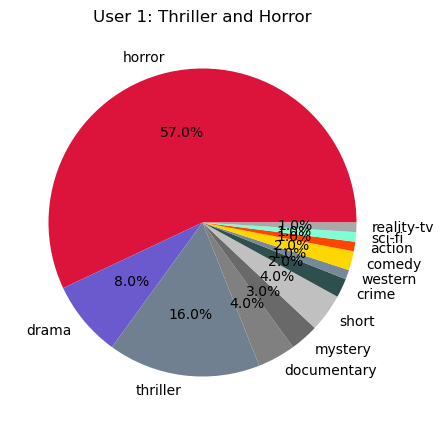

,title,user1,plot,genre
0,Scary Tales (2014),0.258616,SCARY TALES is a unique horror anthology feat...,horror
1,Midnight Abyss (2011),0.249396,Midnight Abyss is a psychological horror film...,horror
2,"Deranged Killers: Stories of Psychos, Sex and...",0.247807,The Sexual Serial Killer: A strange woman dev...,horror
3,Let Me in (2017),0.247427,A family loses their husband and father due t...,drama
4,Stricken (2010),0.24594,After her mother's death and her father's bru...,thriller


In [22]:
# user 1: thriller and horror
# De las 100 primeras recomendaciones, cuántas son de género thriller o horror? - plot circular
# plot bar with number of samples per genre for the first 100 recommendations using the colors defined above for each genre 
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# user 1
user1_genres = []
for i in range(100):
    user1_genres.append(user1_df['genre'].iloc[i])
user1_genres_count = Counter(user1_genres)

plt.figure(figsize=(5,5))
plt.pie(user1_genres_count.values(), labels=user1_genres_count.keys(), colors=[genre_colors[genre] for genre in user1_genres_count.keys()], autopct='%1.1f%%')
plt.title('User 1: Thriller and Horror')
plt.show()


user1_df.head()

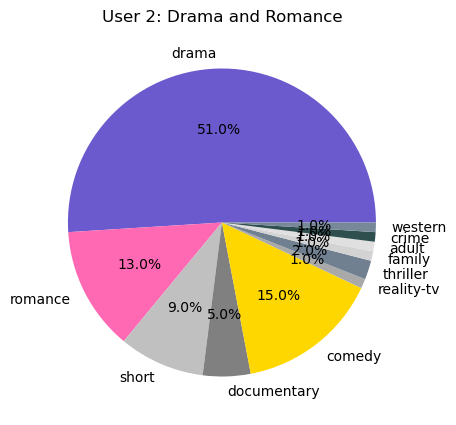

,title,user2,plot,genre
0,"""Aur Pyaar Ho Gaya"" (2014)",0.346305,Love oh love is about the beautiful love stor...,drama
1,Ai Hen Lan (2011),0.321255,Love Actually... Sucks! was inspired by real-...,drama
2,Flipped or Not (2015),0.321166,Flipped or Not is a 2015 Chinese movie. The m...,romance
3,Happy Ending (2015/III),0.290741,"Story of a guy of 20 yrs old, who falls in lo...",romance
4,Agni Pareeksha (1954),0.279785,This story revolves around a young couple - K...,romance


In [23]:
# user 2: drama and romance
plt.figure(figsize=(5,5))
user2_genres = []
for i in range(100):
    user2_genres.append(user2_df['genre'].iloc[i])
user2_genres_count = Counter(user2_genres)

plt.pie(user2_genres_count.values(), labels=user2_genres_count.keys(), colors=[genre_colors[genre] for genre in user2_genres_count.keys()], autopct='%1.1f%%')
plt.title('User 2: Drama and Romance')
plt.show()

user2_df.head()

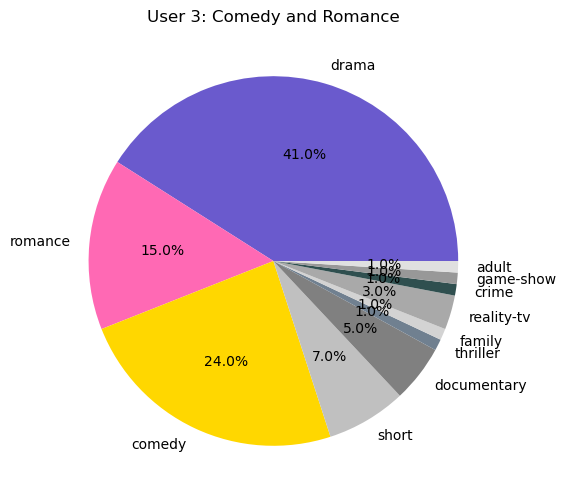

,title,user3,plot,genre
0,"""Aur Pyaar Ho Gaya"" (2014)",0.335573,Love oh love is about the beautiful love stor...,drama
1,Flipped or Not (2015),0.311832,Flipped or Not is a 2015 Chinese movie. The m...,romance
2,Ai Hen Lan (2011),0.311345,Love Actually... Sucks! was inspired by real-...,drama
3,Happy Ending (2015/III),0.281668,"Story of a guy of 20 yrs old, who falls in lo...",romance
4,"""Some Say Love"" (2011)",0.274264,Some Say Love is a 6 x 30 minute observationa...,comedy


In [24]:
#user 3: comedy and romance
plt.figure(figsize=(6, 6))
user3_genres = []
for i in range(100):
    user3_genres.append(user3_df['genre'].iloc[i])
user3_genres_count = Counter(user3_genres)

plt.pie(user3_genres_count.values(), labels=user3_genres_count.keys(), colors=[genre_colors[genre] for genre in user3_genres_count.keys()], autopct='%1.1f%%')
plt.title('User 3: Comedy and Romance')
plt.show()

user3_df.head()

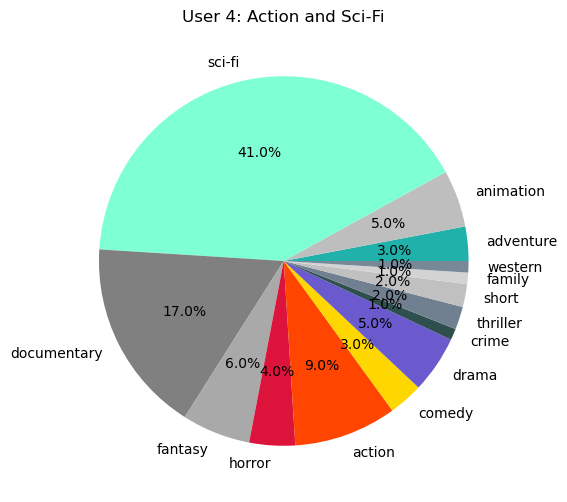

,title,user4,plot,genre
0,Sachi's Quest (2006),0.264246,"In a very dark far future, an elite female ag...",adventure
1,Watch the Skies (2018),0.261496,"When a small starship crashes to earth, it is...",animation
2,Ganitorian Chronicles: Gallaca (????),0.2578,When Earth is attacked by an alien enemy know...,sci-fi
3,Kraa! The Sea Monster (1998),0.252559,"Lord Doom, evil master of Proyas, the Dark Pl...",sci-fi
4,Around the World in 60 Minutes (2011),0.248308,A unique journey around the weird and wonderf...,documentary


In [25]:
# user 4: action and sci-fi
plt.figure(figsize=(6, 6))
user4_genres = []
for i in range(100):
    user4_genres.append(user4_df['genre'].iloc[i])
user4_genres_count = Counter(user4_genres)

plt.pie(user4_genres_count.values(), labels=user4_genres_count.keys(), colors=[genre_colors[genre] for genre in user4_genres_count.keys()], autopct='%1.1f%%')
plt.title('User 4: Action and Sci-Fi')

plt.show()
user4_df.head()

,title,user5,plot,genre
0,Strange Visitors & Other Tales (2001),0.279951,Three bondage-filled vignettes from Harmony C...,adventure
1,Costume Girls Captured on Film (2010),0.268415,"Costume-clad cuties are captured, bound and g...",adventure
2,Hostile Holiday Hostages (2009),0.262623,Nine beautiful are placed in bondage peril du...,adventure
3,Damsel Stories (2014),0.257362,Bondage video with three separate tales. In t...,adult
4,Feisty Females Restrained (2010),0.251034,Five beautiful babes are place in bondage. In...,adventure


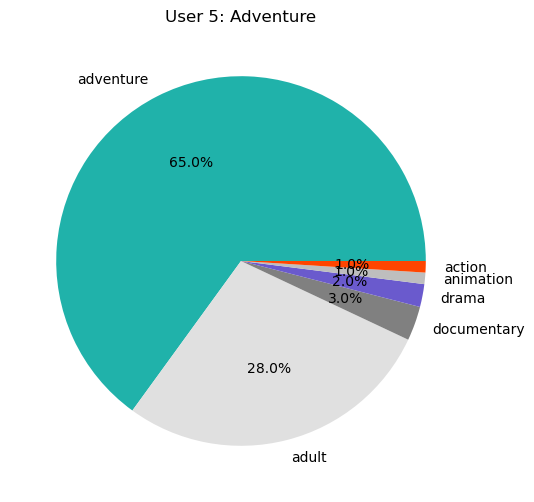

In [26]:
# user 5: adventure
plt.figure(figsize=(6, 6))
user5_genres = []
for i in range(100):
    user5_genres.append(user5_df['genre'].iloc[i])
user5_genres_count = Counter(user5_genres)

plt.pie(user5_genres_count.values(), labels=user5_genres_count.keys(), colors=[genre_colors[genre] for genre in user5_genres_count.keys()], autopct='%1.1f%%')

plt.title('User 5: Adventure')
user5_df.head()

## 4. Deliver each movie only to the user intereste in it

In [27]:
# For each movie in the similarity_df, deliver it only to the user with a similarity value higher than 0.2
# calculte the threshold for each user so it is two thirds of the maximum similarity value
th1 = (user1_df['user1'].max() / 3)*2
th2 = (user2_df['user2'].max() / 3)*2
th3 = (user3_df['user3'].max() / 3)*2
th4 = (user4_df['user4'].max() / 3)*2
th5 = (user5_df['user5'].max() / 3)*2


user1_df2 = user1_df[user1_df['user1'] > th1]
user2_df2 = user2_df[user2_df['user2'] > th2]
user3_df2 = user3_df[user3_df['user3'] > th3]
user4_df2 = user4_df[user4_df['user4'] > th4]
user5_df2 = user5_df[user5_df['user5'] > th5]

## Results

In [29]:
# user 1: thriller and horror
print('Number of movies for user 1:', len(user1_df2))
user1_df2.head(2)

Number of movies for user 1: 251


,title,user1,plot,genre
0,Scary Tales (2014),0.258616,SCARY TALES is a unique horror anthology feat...,horror
1,Midnight Abyss (2011),0.249396,Midnight Abyss is a psychological horror film...,horror


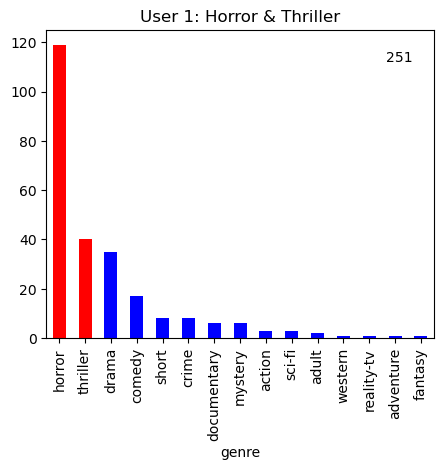

In [31]:
# plot graph bar with the number of movies per genre
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
# plot bar. Colors for horror and thriller = pink. the rest in blue
user1_df2['genre'].value_counts().plot(kind='bar', color=['red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])
plt.annotate(len(user1_df2), xy=(1, 1), xytext=(-15, -15), ha='right', va='top', xycoords='axes fraction', textcoords='offset points')

plt.title('User 1: Horror & Thriller')
plt.show()


In [32]:
# user 2: drama and romance
print('Number of movies for user 2:', len(user2_df2))   
user2_df2.head(2)

Number of movies for user 2: 43


,title,user2,plot,genre
0,"""Aur Pyaar Ho Gaya"" (2014)",0.346305,Love oh love is about the beautiful love stor...,drama
1,Ai Hen Lan (2011),0.321255,Love Actually... Sucks! was inspired by real-...,drama


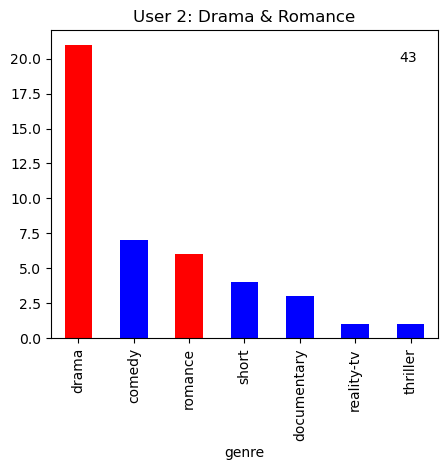

In [33]:
plt.figure(figsize=(5,4))
# plot bar. Colors for drama and romance = pink. the rest in blue
user2_df2['genre'].value_counts().plot(kind='bar', color=['red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])
plt.annotate(len(user2_df2), xy=(1, 1), xytext=(-15, -15), ha='right', va='top', xycoords='axes fraction', textcoords='offset points')

plt.title('User 2: Drama & Romance')
plt.show()

In [34]:
# user 3: comedy and romance
print('Number of movies for user 3:', len(user3_df2))
user3_df2.head(2)


Number of movies for user 3: 48


,title,user3,plot,genre
0,"""Aur Pyaar Ho Gaya"" (2014)",0.335573,Love oh love is about the beautiful love stor...,drama
1,Flipped or Not (2015),0.311832,Flipped or Not is a 2015 Chinese movie. The m...,romance


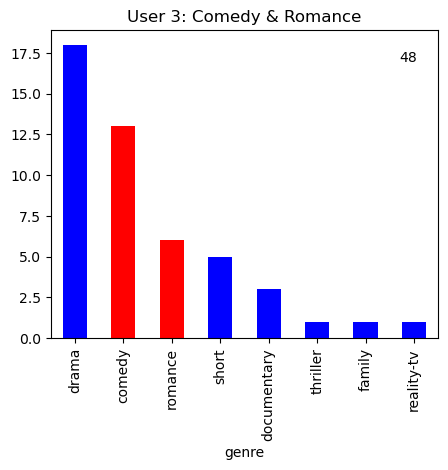

In [36]:
plt.figure(figsize=(5,4))
# plot bar. Colors for comedy and romance = pink. the rest in blue
user3_df2['genre'].value_counts().plot(kind='bar', color=['blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])
# anotate the number of movies for the user (len(user3_df2)) upper right corner
plt.annotate(len(user3_df2), xy=(1, 1), xytext=(-15, -15), ha='right', va='top', xycoords='axes fraction', textcoords='offset points')
plt.title('User 3: Comedy & Romance')
plt.show()

In [37]:
# user 4: action and sci-fi
print('Number of movies for user 4:', len(user4_df2))
user4_df2.head(2)



Number of movies for user 4: 129


,title,user4,plot,genre
0,Sachi's Quest (2006),0.264246,"In a very dark far future, an elite female ag...",adventure
1,Watch the Skies (2018),0.261496,"When a small starship crashes to earth, it is...",animation


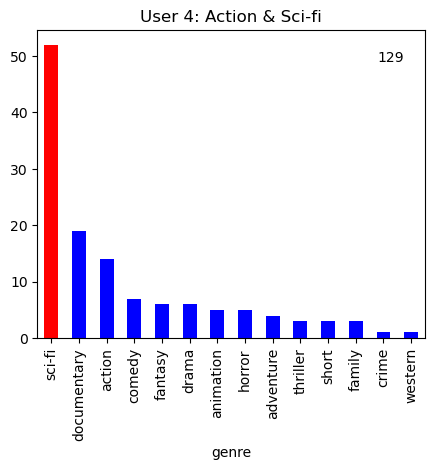

In [38]:
plt.figure(figsize=(5,4))
# plot bar. Colors for action and sci-fi = pink. the rest in blue
user4_df2['genre'].value_counts().plot(kind='bar', color=['red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'])
plt.annotate(len(user4_df2), xy=(1, 1), xytext=(-15, -15), ha='right', va='top', xycoords='axes fraction', textcoords='offset points')

plt.title('User 4: Action & Sci-fi')
plt.show()

In [39]:
# user 5: adventure
print('Number of movies for user 5:', len(user5_df2))
user5_df2.head(2)

Number of movies for user 5: 75


,title,user5,plot,genre
0,Strange Visitors & Other Tales (2001),0.279951,Three bondage-filled vignettes from Harmony C...,adventure
1,Costume Girls Captured on Film (2010),0.268415,"Costume-clad cuties are captured, bound and g...",adventure


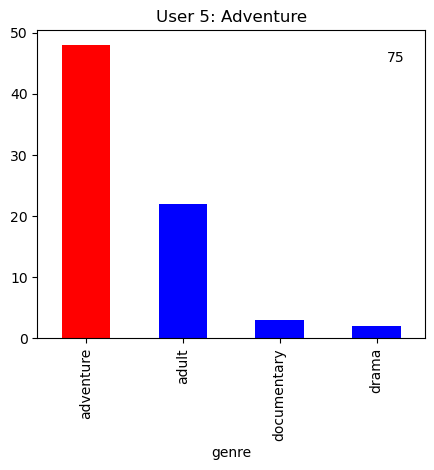

In [40]:
plt.figure(figsize=(5,4))
# plot bar. Colors for adventure = pink. the rest in blue
user5_df2['genre'].value_counts().plot(kind='bar', color=['red','blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue','blue', 'blue', 'blue', 'blue'])
plt.annotate(len(user5_df2), xy=(1, 1), xytext=(-15, -15), ha='right', va='top', xycoords='axes fraction', textcoords='offset points')

plt.title('User 5: Adventure')
plt.show()
                                                

# Evaluating

In [72]:
def evaluation(user_df, test_df, topics):
    pos = user_df['title'].values
    neg = [title for title in test_df['title'].values if title not in pos]
    
    # TP
    tp = user_df[user_df['genre'].isin(topics)].shape[0]
    # FP
    fp = user_df[~user_df['genre'].isin(topics)].shape[0]
    # TN
    tn = len([title for title in neg if clean_test_df[clean_test_df['title'] == title]['genre'].values[0] not in topics])
    # FN
    fn = len([title for title in neg if clean_test_df[clean_test_df['title'] == title]['genre'].values[0] in topics])
    
    return tp, fp, tn, fn

topics_interest = [['thriller', 'horror'], ['drama', 'romance'], ['comedy', 'romance'], ['action', 'sci-fi'], ['adventure']]
users_dfs = [user1_df2, user2_df2, user3_df2, user4_df2, user5_df2]

In [73]:
evaluations = []
for i in range(len(users_dfs)):
    evaluations.append(evaluation(users_dfs[i], clean_test_df, topics_interest[i]))

In [74]:
evaluations

[(159, 92, 50314, 3635),
 (27, 16, 39900, 14257),
 (19, 29, 46053, 8099),
 (66, 63, 52177, 1894),
 (48, 27, 53398, 727)]

In [81]:
def metrics(tp, fp, tn, fn):
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)
    return accuracy, precision, recall, f1



    

In [88]:
# PRINT METRICS FOR EACH USER
for i in range(len(evaluations)):
    tp, fp, tn, fn = evaluations[i]
    accuracy, precision, recall, f1 = metrics(tp, fp, tn, fn)
    print(f'User {i + 1}')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print([tp, fp])
    print([fn, tn])
    print('\n')

User 1
Accuracy: 0.93
Precision: 0.63
Recall: 0.04
F1 Score: 0.08
[159, 92]
[3635, 50314]


User 2
Accuracy: 0.74
Precision: 0.63
Recall: 0.00
F1 Score: 0.00
[27, 16]
[14257, 39900]


User 3
Accuracy: 0.85
Precision: 0.40
Recall: 0.00
F1 Score: 0.00
[19, 29]
[8099, 46053]


User 4
Accuracy: 0.96
Precision: 0.51
Recall: 0.03
F1 Score: 0.06
[66, 63]
[1894, 52177]


User 5
Accuracy: 0.99
Precision: 0.64
Recall: 0.06
F1 Score: 0.11
[48, 27]
[727, 53398]


